<a href="https://colab.research.google.com/github/souken-b/calc_OWC/blob/main/calc_flow_rate_by_tb_back.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
def force_ci(c_ci: '縮流係数'):
  return ((1 / c_ci) - (1 / (2 * (c_ci ** 2))))

In [124]:
def c_ci(d_ratio: 'diameter ratiodiameter'):
  # flow coefficient
  f_coef = 0.598 - 0.003 * (d_ratio ** 2) + 0.404 * (d_ratio ** 4)
  return (f_coef / ((1 + (d_ratio ** 4) * (f_coef ** 2)) ** (1/2)))

In [125]:
def c_c(f_ci: 'force coef', p_up, p_down, h_ratio):
  p_ratio = p_up / p_down
  h_ratio_rev = 1/ h_ratio
  return ((1 / (2 * f_ci)) * (p_ratio ** h_ratio_rev) * (1 - (1 - ((2 * f_ci * (1 - h_ratio_rev)) * (1 - (1 / p_ratio)) / (1- (p_ratio) ** (h_ratio_rev - 1))))  ** (1/2)))

In [126]:
def flow(c_c, n_area, p_air, p_down, h_ratio, dens_air):
  h_ratio_rev = 1 / h_ratio
  return  c_c * n_area  * ((p_air / p_down) ** (-1 * h_ratio_rev)) * (((2 / (1 - h_ratio_rev)) * (p_air / dens_air) * (1 - (p_air / p_down) ** (h_ratio_rev - 1))) ** (1 / 2))

In [127]:
def flow_coef(c_c, n_ratio, h_ratio, p_air, p_down):
  h_ratio_rev = 1 / h_ratio
  flow_coef = c_c / ((1 - ((c_c ** 2) * n_ratio * ((p_air / p_down) ** (-2*h_ratio_rev)))) ** (1/2))
  return flow_coef

In [128]:
def rey_num(flow,  n_diam):
  # air viscosity rate(Pa・s)
  a_v_rate = 18.2 * 1e-6
  # air temparature(K)
  a_temp = 273 + 25
  # sutherland constant
  c_suther = 117
  # viscosity rate
  v_rate = a_v_rate * ((a_temp + c_suther) / (a_temp + c_suther)) * (a_temp / a_temp)**(3/2)
  # upstream density
  dens_up = 1.225 
  c_lambda = (4/(pi * n_diam))*(dens_up / v_rate)
  rey_num = c_lambda * flow
  return rey_num

In [129]:
n_diam = 0.8123 / 100
d_ratio = 0
a_0 = pi * (((25.4 / 2) / (1000)) ** 2)
p_air = 101325 
n_ratio = 0
n_area = pi * ((n_diam / 2) ** 2)
h_ratio = 1.4
dens_air = 1.225
t_back = np.linspace(np.pi, (3 * np.pi / 2), 5000)
sin_list = np.sin(t_back)
p0_list_in = [(700*i + 101325 ) for i in sin_list]
rey_num_list = []
flow_coef_list = []
c_c_list = []
flow_list = []

In [130]:
for p0 in p0_list_in:
  dens_down = 1.225 * ((p0 / p_air) ** (1 / h_ratio))
  temp_down = ((28.93/1000) / 8.3144) * (p0 / dens_down)
  c_ci_c = c_ci(d_ratio)
  f_ci_c = force_ci(c_ci_c)
  # 圧縮性流体力学
  c_c_c = c_c(f_ci_c, p_air, p0, h_ratio)
  c_c_list.append(c_c_c)
  flow_coef_c =  flow_coef(c_c_c, n_ratio, h_ratio, p_air, p0)
  q = flow(flow_coef_c, n_area, p_air, p0, h_ratio, dens_air)
  rey_num_c = rey_num(q, n_diam)
  rey_num_list.append(rey_num_c ** (1/2))
  flow_coef_list.append(flow_coef_c)
  flow_list.append(q)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


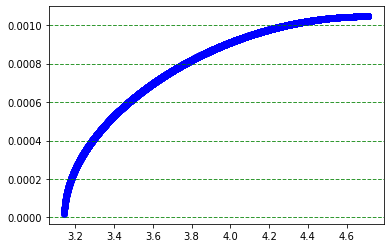

In [135]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(t_back, flow_list, c='blue')
ax.grid(which = "major", axis = "y", color = "green", alpha = 0.8, linestyle = "--", linewidth = 1)
fig.show()